In [3]:
install.packages('Rtsne')

package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\austi\AppData\Local\Temp\RtmpQRzCpB\downloaded_packages


Warning message:
"package 'Rtsne' was built under R version 3.6.3"

Performing PCA
Read the 10000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 10000
Done in 28.15 seconds (sparsity = 0.012259)!
Learning embedding...
Iteration 50: error is 97.574506 (50 iterations in 5.44 seconds)
Iteration 100: error is 91.018624 (50 iterations in 9.68 seconds)
Iteration 150: error is 86.433139 (50 iterations in 4.73 seconds)
Iteration 200: error is 86.128691 (50 iterations in 4.83 seconds)
Iteration 250: error is 86.078752 (50 iterations in 4.85 seconds)
Iteration 300: error is 3.136155 (50 iterations in 4.15 seconds)
Iteration 350: error is 2.728456 (50 iterations in 4.01 seconds)
Iteration 400: error is 2.511135 (50 iterations in 4.02 seconds)
Iteration 450: error is 2.368310 (50 iterations in 3.59 seconds)
Iteration 500: error is 2.266006 (50 iterations in 3.69 seconds)
Fitting performed in 48.99 seconds.
Performing PCA


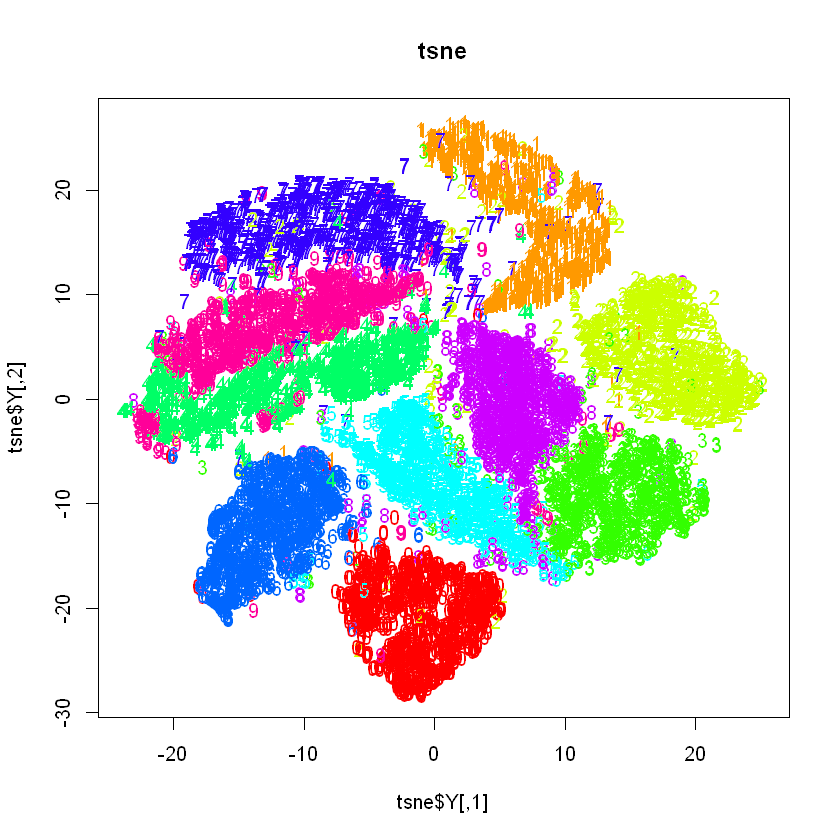

In [4]:
train<- read.csv(file.choose()) ## Choose the train.csv file downloaded from the link above  
library(Rtsne)
## Curating the database for analysis with both t-SNE and PCA
Labels<-train$label
train$label<-as.factor(train$label)
## for plotting
colors = rainbow(length(unique(train$label)))
names(colors) = unique(train$label)

## Executing the algorithm on curated data
tsne <- Rtsne(train[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
exeTimeTsne<- system.time(Rtsne(train[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

## Plotting
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=train$label, col=colors[train$label])

In [12]:
train<- read.csv(file.choose(), sep=';' ) 

In [14]:
train <- na.omit(train) 

In [20]:
train$Insulin[train$Insulin=="Zero"] <- 0

In [22]:
train$Outcome[train$Outcome=="N"] <- 0

In [23]:
train$Outcome[train$Outcome=="Y"] <- 1

Performing PCA
Read the 534 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.21 seconds (sparsity = 0.222559)!
Learning embedding...
Iteration 50: error is 62.766602 (50 iterations in 0.20 seconds)
Iteration 100: error is 59.612491 (50 iterations in 0.17 seconds)
Iteration 150: error is 59.608717 (50 iterations in 0.13 seconds)
Iteration 200: error is 59.609867 (50 iterations in 0.13 seconds)
Iteration 250: error is 59.609621 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.868382 (50 iterations in 0.15 seconds)
Iteration 350: error is 0.798604 (50 iterations in 0.14 seconds)
Iteration 400: error is 0.771440 (50 iterations in 0.15 seconds)
Iteration 450: error is 0.757150 (50 iterations in 0.14 seconds)
Iteration 500: error is 0.753036 (50 iterations in 0.15 seconds)
Fitting performed in 1.48 seconds.
Performing PCA
Read the 534 x 50 data matri

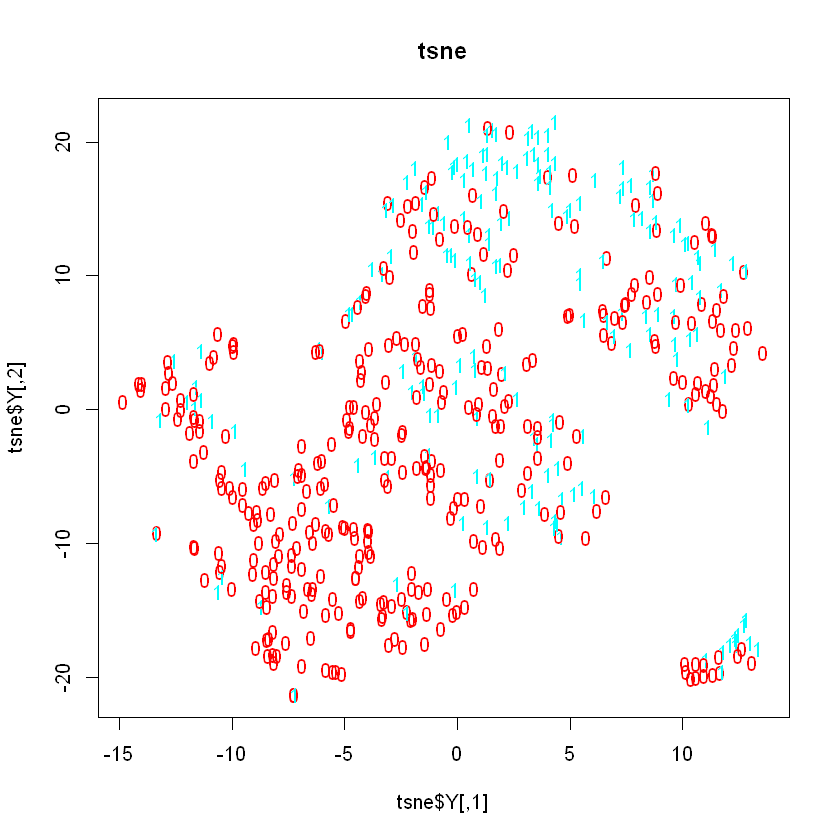

In [25]:
## Choose the train.csv file downloaded from the link above  
library(Rtsne)
## Curating the database for analysis with both t-SNE and PCA
Labels<-train$Outcome
train$Outcome<-as.factor(train$Outcome)
## for plotting
colors = rainbow(length(unique(train$Outcome)))
names(colors) = unique(train$Outcome)

## Executing the algorithm on curated data
tsne <- Rtsne(train[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
exeTimeTsne<- system.time(Rtsne(train[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

## Plotting
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=train$Outcome, col=colors[train$Outcome])

In [27]:
xm = as.matrix(train)
str(xm)


 chr [1:534, 1:9] " 1" " 8" " 1" " 3" " 2" " 4" "10" "10" " 7" " 0" " 7" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:534] "2" "3" "4" "7" ...
  ..$ : chr [1:9] "Pregnancies" "Glucose" "BloodPressure" "SkinThickness" ...


In [28]:
Ktrain <- train$Outcome
image(Ktrain)

ERROR: Error in image.default(Ktrain): argument must be matrix-like


In [40]:
library(caret) #this package has the createDataPartition function
    
 set.seed(123) #randomization`
    
 #creating indices
 trainIndex <- createDataPartition(train$Outcome,p=0.75,list=FALSE)
    
 #splitting data into training/testing data using the trainIndex object
 IRIS_TRAIN <- train[trainIndex,] #training data (75% of data)
    
 IRIS_TEST <- train[-trainIndex,]

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message in createDataPartition(train$Outcome, p = 0.75, list = FALSE):
"Some classes have no records ( N, Y ) and these will be ignored"

In [71]:
mylogit <- glm(Outcome ~Pregnancies+Glucose+BloodPressure+SkinThickness+BMI+DiabetesPedigreeFunction+Age, data = IRIS_TRAIN, family = "binomial")

In [72]:
summary(mylogit)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    SkinThickness + BMI + DiabetesPedigreeFunction + Age, family = "binomial", 
    data = IRIS_TRAIN)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5001  -0.7259  -0.3692   0.6780   2.2795  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.583815   0.979689  -8.762  < 2e-16 ***
Pregnancies               0.127023   0.041424   3.066  0.00217 ** 
Glucose                   0.037005   0.004895   7.561 4.02e-14 ***
BloodPressure            -0.014208   0.007426  -1.913  0.05569 .  
SkinThickness             0.005707   0.008781   0.650  0.51572    
BMI                       0.087109   0.021157   4.117 3.83e-05 ***
DiabetesPedigreeFunction  1.033873   0.403582   2.562  0.01041 *  
Age                       0.008912   0.009984   0.893  0.37202    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for

In [55]:
test<-IRIS_TEST[,-9]

In [61]:

cats.prob = predict(mylogit, test, type="response")


ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Insulin has new levels 112, 119, 122, 128, 160, 171, 196, 231, 255, 280, 293, 310, 375, 387, 392, 41, 44, 465, 50, 60, 61, 71, 74


In [74]:
IRIS_TEST$Outcome

[1] 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1
 [38] 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0
[112] 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0
Levels: 0 1 N Y

In [98]:
library(ROCR)
p <- predict(mylogit, newdata=test, type="response")


In [78]:
p<-predict.glm(mylogit, newdata = test, type = "response")

In [79]:
summary(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0173  0.1162  0.2413  0.3260  0.5029  0.9597 

In [96]:
glm.pred <- ifelse(p > 0.45, 1, 0)

In [97]:
table(glm.pred, IRIS_TEST$Outcome)

        
glm.pred  0  1  N  Y
       0 74 24  0  0
       1 11 23  0  0

In [ ]:
SVM

In [102]:
install.packages('e1071')

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\austi\AppData\Local\Temp\RtmpQRzCpB\downloaded_packages


In [104]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [100]:
train1<-IRIS_TRAIN[,-9]

In [105]:
dat = data.frame(train1, y = as.factor(IRIS_TRAIN$Outcome))
svmfit = svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
print(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  213



In [108]:
plot(svmfit, dat)


ERROR: Error in plot.svm(svmfit, dat): missing formula.


In [109]:
fit = svm(factor(y) ~ ., data = dat, scale = FALSE, kernel = "radial", cost = 5)

In [110]:
xgrid = expand.grid(X1 = px1, X2 = px2)
ygrid = predict(fit, xgrid)

ERROR: Error in expand.grid(X1 = px1, X2 = px2): object 'px1' not found


In [ ]:
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = .2)
points(x, col = y + 1, pch = 19)